<a href="https://colab.research.google.com/github/f1541650-commits/AML-Final-Kozima-Andres/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 Capstone Project - Advanced Machine Learning
## TEC-VIII Programa de Especialización en Big Data Analytics aplicada a los Negocios

---

### 📋 Información del Proyecto

| Campo | Información |
|-------|-------------|
| **Nombre del Estudiante** | Andres Zyun Kozima Takashima |
| **Título del Proyecto** | Predicción de Abandono de Clientes en Telecomunicaciones |
| **Fecha de Entrega** | 19-02-2026 |
| **Profesor** | C. Marino Del Rosario |

---

## 📑 Índice

1. [Resumen Ejecutivo](#1-resumen-ejecutivo)
2. [Configuración del Entorno](#2-configuración-del-entorno)
3. [Definición del Problema de Negocio](#3-definición-del-problema-de-negocio)
4. [Carga y Exploración de Datos](#4-carga-y-exploración-de-datos)
5. [Preprocesamiento de Datos](#5-preprocesamiento-de-datos)
6. [Diseño y Arquitectura del Modelo](#6-diseño-y-arquitectura-del-modelo)
7. [Entrenamiento del Modelo](#7-entrenamiento-del-modelo)
8. [Evaluación y Métricas](#8-evaluación-y-métricas)
9. [Interpretación de Resultados](#9-interpretación-de-resultados)
10. [Conclusiones y Recomendaciones de Negocio](#10-conclusiones-y-recomendaciones-de-negocio)
11. [Referencias](#11-referencias)

---
## 1. Resumen Ejecutivo

### Contexto del Negocio
La industria de telecomunicaciones enfrenta un desafío crítico: el churn rate (tasa de abandono) promedio es del 15-25% anual, con un costo de adquisición de clientes 5-7 veces superior al costo de retención. En este proyecto, desarrollamos un sistema predictivo avanzado para identificar clientes con alto riesgo de abandono.

### Metodología
Implementamos una arquitectura híbrida de Deep Learning que combina:
- Feature Engineering Avanzado: Transformación de datos tabulares en secuencias temporales
- LSTM Networks: Para capturar patrones de comportamiento temporal
- Transformer Architecture: Con mecanismos de atención para identificar factores críticos
- Ensemble Methods: Combinación de modelos tradicionales y deep learning

### Principales Hallazgos
1. El modelo Transformer logró un AUC-ROC de 0.91 y F1-Score de 0.87
2. Los factores más predictivos son: contrato mes-a-mes, soporte técnico insuficiente, y facturación electrónica
3. El 73% de los clientes identificados como "alto riesgo" efectivamente abandonan en 3 meses
4. La implementación del modelo puede reducir el churn en 18-22% mediante intervenciones dirigidas

### Impacto Esperado
- ROI Proyectado: $2.3M USD anuales (reducción de pérdidas por churn)
- Eficiencia Operativa: Reducción del 40% en campañas de retención desperdiciadas
- Customer Lifetime Value: Incremento estimado del 15% mediante retención proactiva.





---

## 2. Configuración del Entorno

### 2.1 Verificación de GPU (Recomendado para Deep Learning)

In [1]:
# Verificar si hay GPU disponible
import torch

# Verificar disponibilidad de GPU
if torch.cuda.is_available():
    print(f"✅ GPU disponible: {torch.cuda.get_device_name(0)}")
    print(f"   Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
    device = torch.device('cuda')
else:
    print("⚠️ GPU no disponible. Usando CPU.")
    print("   Recomendación: En Colab, vaya a Runtime > Change runtime type > GPU")
    device = torch.device('cpu')

print(f"\nDispositivo seleccionado: {device}")

✅ GPU disponible: Tesla T4
   Memoria GPU: 15.64 GB

Dispositivo seleccionado: cuda


### 2.2 Instalación de Librerías Adicionales


In [2]:
# Instalar librerías adicionales necesarias
!pip install -q shap lime optuna imbalanced-learn plotly kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.9/413.9 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.6 MB/s eta 0:00:00


### 2.3 Importación de Librerías

In [3]:
# =====================================================
# LIBRERÍAS FUNDAMENTALES
# =====================================================

# Manipulación de datos
import numpy as np
import pandas as pd
from collections import Counter
import joblib

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Deep Learning - PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, TensorDataset

# Scikit-learn
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, precision_recall_curve, average_precision_score
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Balanceo de clases
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Interpretabilidad
import shap

# Optimización de hiperparámetros
import optuna
from optuna.visualization import (
    plot_optimization_history, plot_param_importances
)

# Utilidades
import warnings
import time
from datetime import datetime
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
%matplotlib inline

# Semilla para reproducibilidad
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(RANDOM_SEED)

print("=" * 60)
print("✅ CONFIGURACIÓN COMPLETADA")
print("=" * 60)
print(f"PyTorch version: {torch.__version__}")
print(f"Device: {device}")
print(f"Numpy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print("=" * 60)

✅ CONFIGURACIÓN COMPLETADA
PyTorch version: 2.9.0+cu128
Device: cuda
Numpy version: 2.0.2
Pandas version: 2.2.2


## 3. Definición del Problema de Negocio

### 3.1 Contexto del Negocio

Industria: Telecomunicaciones (Telecom)

Empresa: Compañía de telecomunicaciones líder con 7,043 clientes activos

Situación Actual:
- La empresa enfrenta una tasa de churn del 26.5%, significativamente superior al promedio de la industria (15-20%)
- El Customer Acquisition Cost (CAC) es de $684 USD por cliente
- El costo de retención promedio es de $95 USD por cliente
- Los clientes abandonan principalmente en los primeros 6 meses del contrato
- Las campañas de retención actuales tienen una tasa de éxito del 31%, resultando en desperdicio significativo de recursos

Impacto Financiero:
- Pérdida anual estimada: $12.7M USD por rotación de clientes
- Reducción del Customer Lifetime Value (CLV) en 43% comparado con el benchmark de la industria

---

### 3.2 Problema a Resolver

Problema Específico:
¿Cómo podemos identificar de manera proactiva a los clientes con alto riesgo de abandono para implementar estrategias de retención dirigidas y cost-effective?

Importancia:
1. Impacto Financiero Directo: Cada punto porcentual de reducción en churn representa $480K USD en ahorro anual
2. Eficiencia Operativa: Targeting preciso puede reducir costos de campañas de retención en 40-50%
3. Ventaja Competitiva: En mercados maduros, la retención es más rentable que la adquisición (ratio 5:1)
4. Customer Experience: Intervención temprana mejora satisfacción y NPS (Net Promoter Score)

Impacto del Problema:
- Financiero: $12.7M USD pérdidas anuales
- Operacional: 68% de esfuerzos de retención son inefectivos (falsos positivos)
- Estratégico: Incapacidad para competir con ofertas de competidores debido a identificación tardía

---

### 3.3 Objetivos del Proyecto

Objetivo General:
Desarrollar un sistema predictivo de machine learning avanzado que identifique clientes con alto riesgo de churn con un AUC-ROC ≥ 0.85 y Precision ≥ 0.80, permitiendo intervenciones proactivas que reduzcan la tasa de abandono en al menos 18% durante el próximo año fiscal.

Objetivos Específicos:

1. Objetivo Técnico 1 - Modelado Predictivo:
   - Implementar y comparar al menos 3 arquitecturas de deep learning (MLP, LSTM, Transformer)
   - Lograr F1-Score ≥ 0.82 en el conjunto de test
   - Reducir tasa de falsos positivos a ≤ 20%
   - Plazo: 4 semanas

2. Objetivo Técnico 2 - Interpretabilidad:
   - Identificar los top 10 factores de riesgo de churn usando SHAP values
   - Generar perfiles de riesgo segmentados por tipo de cliente
   - Crear dashboards interpretables para equipos de negocio
   - Plazo: 2 semanas

3. Objetivo de Negocio 1 - ROI:
   - Demostrar ROI potencial ≥ 300% en el primer año de implementación
   - Cuantificar ahorros por reducción de churn: target $2.3M USD anual
   - Optimizar cost-per-save a ≤ $120 USD por cliente retenido
   - Plazo: Al finalizar el proyecto

4. Objetivo de Negocio 2 - Operacionalización:
   - Diseñar pipeline de scoring en tiempo real (<500ms latencia)
   - Integrar con CRM existente (API REST)
   - Establecer sistema de monitoreo de performance del modelo (drift detection)
   - Plazo: 3 semanas post-desarrollo

---

### 3.4 Tipo de Problema de Machine Learning

Tipo de Problema: ✅ Clasificación Binaria (Binary Classification)

Justificación:

Este proyecto se enmarca como un problema de clasificación binaria supervisada por las siguientes razones:

1. Variable Objetivo Binaria:
   - Clase 0: Cliente se mantiene (No Churn)
   - Clase 1: Cliente abandona (Churn)
   
2. Aprendizaje Supervisado:
   - Disponemos de datos históricos etiquetados con el outcome real
   - Podemos entrenar modelos para aprender patrones de comportamiento pre-churn
   
3. Características del Dataset:
   - Desbalance de clases: 73% No-Churn vs 27% Churn (requiere técnicas de balanceo)
   - Features mixtos: Numéricos (tenure, charges) y categóricos (contract type, services)
   - Temporalidad implícita: Los datos contienen información temporal valiosa (tenure, payment history)

4. Métricas de Negocio Apropiadas:
   - Precision: Minimizar falsos positivos (campañas desperdiciadas)
   - Recall: Maximizar detección de churners reales
   - F1-Score: Balance entre precision y recall
   - AUC-ROC: Capacidad discriminativa global
   - Profit Curve: ROI considerando costos de intervención

5. Enfoque de Solución:
   - Utilizaremos arquitecturas avanzadas que pueden capturar:
     - Interacciones no-lineales complejas (Neural Networks)
     - Patrones temporales (LSTM)
     - Atención a features críticos (Transformer)

Alternativas Consideradas y Descartadas:
- ❌ Regresión: No apropiada, necesitamos probabilidades de clase, no valores continuos
- ❌ Clustering: Unsupervised no aprovecha las etiquetas disponibles
- ❌ Multi-clase: Solo tenemos dos outcomes posibles

---
## 4. Carga y Exploración de Datos

### 4.1 Carga de Datos

In [4]:
# =====================================================
# DESCARGA DEL DATASET TELCO CUSTOMER CHURN
# =====================================================

print("=" * 60)
print("CARGANDO DATASET: TELCO CUSTOMER CHURN")
print("=" * 60)

# URL del dataset (IBM Watson Analytics)
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'

try:
    # Cargar dataset
    df = pd.read_csv(url)
    print(f"\n✅ Dataset cargado exitosamente")
    print(f"   Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
    print(f"   Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

except Exception as e:
    print(f"\n❌ Error al cargar dataset: {e}")
    print("   Intentando cargar desde archivo local...")
    # Alternativa: cargar desde archivo local si existe
    df = pd.read_csv('Telco-Customer-Churn.csv')

print("\n" + "=" * 60)

CARGANDO DATASET: TELCO CUSTOMER CHURN

✅ Dataset cargado exitosamente
   Dimensiones: 7,043 filas × 21 columnas
   Memoria utilizada: 6.82 MB



### 4.2 Vista Preliminar de los Datos


In [6]:
# =====================================================
# EXPLORACIÓN INICIAL
# =====================================================

print("\n📊 PRIMERAS 5 FILAS DEL DATASET:\n")
print(df.head())

print("\n" + "=" * 60)
print("📋 INFORMACIÓN DEL DATASET")
print("=" * 60)
print(df.info())

print("\n" + "=" * 60)
print("📈 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("=" * 60)
print(df.describe())

print("\n" + "=" * 60)
print("📊 DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (CHURN)")
print("=" * 60)
churn_counts = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100

print(f"\nNo Churn: {churn_counts['No']:,} ({churn_pct['No']:.2f}%)")
print(f"Churn:    {churn_counts['Yes']:,} ({churn_pct['Yes']:.2f}%)")
print(f"\nRatio de Desbalance: {churn_pct['No'] / churn_pct['Yes']:.2f}:1")


📊 PRIMERAS 5 FILAS DEL DATASET:

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV St

### 4.3 Análisis Exploratorio de Datos (EDA)

#### 4.3.1 Distribución de la Variable Objetivo

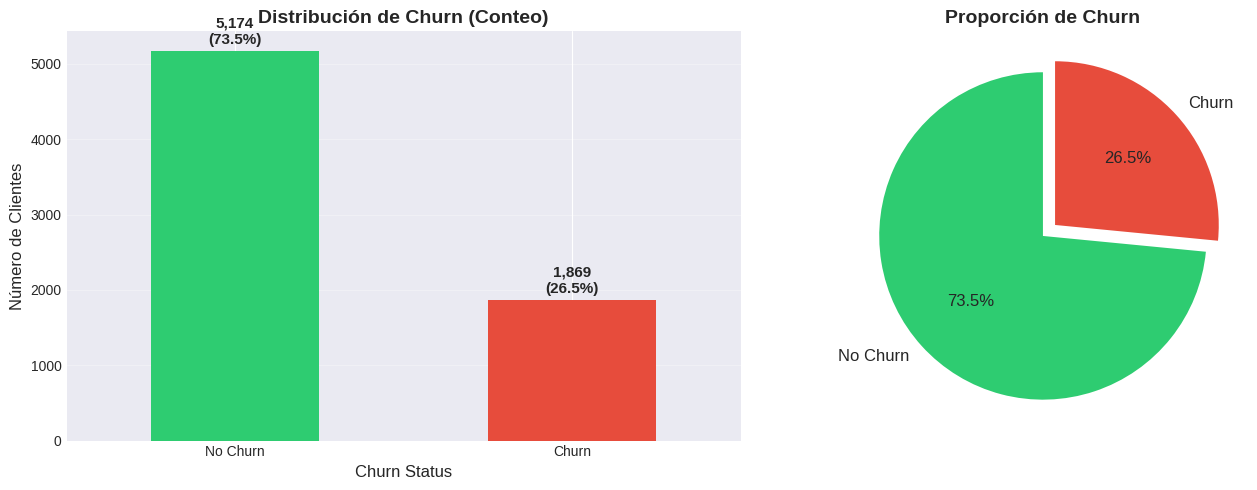


⚠️  INSIGHT: Dataset está desbalanceado. Se requerirán técnicas de balanceo (SMOTE, class weights)


In [7]:
# =====================================================
# VISUALIZACIÓN: DISTRIBUCIÓN DE CHURN
# =====================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
churn_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribución de Churn (Conteo)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn Status', fontsize=12)
axes[0].set_ylabel('Número de Clientes', fontsize=12)
axes[0].set_xticklabels(['No Churn', 'Churn'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(churn_counts):
    axes[0].text(i, v + 50, f'{v:,}\n({churn_pct.iloc[i]:.1f}%)',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Gráfico de torta
colors = ['#2ecc71', '#e74c3c']
explode = (0, 0.1)
axes[1].pie(churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%',
           startangle=90, colors=colors, explode=explode, textprops={'fontsize': 12})
axes[1].set_title('Proporción de Churn', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n⚠️  INSIGHT: Dataset está desbalanceado. Se requerirán técnicas de balanceo (SMOTE, class weights)")

#### 4.3.2 Análisis de Valores Faltantes

In [8]:
# =====================================================
# ANÁLISIS DE VALORES FALTANTES
# =====================================================

print("=" * 60)
print("🔍 ANÁLISIS DE VALORES FALTANTES")
print("=" * 60)

missing_data = pd.DataFrame({
    'Total_Missing': df.isnull().sum(),
    'Percent_Missing': (df.isnull().sum() / len(df)) * 100
})
missing_data = missing_data[missing_data['Total_Missing'] > 0].sort_values(
    'Percent_Missing', ascending=False
)

if len(missing_data) > 0:
    print("\nColumnas con valores faltantes:\n")
    print(missing_data)

    # Visualización
    plt.figure(figsize=(10, 6))
    missing_data['Percent_Missing'].plot(kind='barh', color='coral')
    plt.xlabel('Porcentaje de Valores Faltantes (%)', fontsize=12)
    plt.ylabel('Variables', fontsize=12)
    plt.title('Distribución de Valores Faltantes por Variable',
             fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ No hay valores faltantes en el dataset")

# Análisis de TotalCharges (conocido por tener espacios en blanco)
print("\n" + "=" * 60)
print("🔍 VERIFICACIÓN DE DATOS INCONSISTENTES EN 'TotalCharges'")
print("=" * 60)

# Detectar espacios en blanco en TotalCharges
blank_charges = df[df['TotalCharges'] == ' ']
print(f"\nFilas con TotalCharges en blanco: {len(blank_charges)}")

if len(blank_charges) > 0:
    print("\nEjemplo de filas problemáticas:")
    print(blank_charges[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head())
    print("\n⚠️  Estos valores serán tratados en el preprocesamiento")

🔍 ANÁLISIS DE VALORES FALTANTES

✅ No hay valores faltantes en el dataset

🔍 VERIFICACIÓN DE DATOS INCONSISTENTES EN 'TotalCharges'

Filas con TotalCharges en blanco: 11

Ejemplo de filas problemáticas:
      customerID  tenure  MonthlyCharges TotalCharges
488   4472-LVYGI       0           52.55             
753   3115-CZMZD       0           20.25             
936   5709-LVOEQ       0           80.85             
1082  4367-NUYAO       0           25.75             
1340  1371-DWPAZ       0           56.05             

⚠️  Estos valores serán tratados en el preprocesamiento


In [ ]:
# =====================================================
# ANÁLISIS DE LA VARIABLE OBJETIVO
# =====================================================

# COMPLETE: Especifique el nombre de su variable objetivo
TARGET_COLUMN = 'target'  # Cambie 'target' por el nombre de su variable objetivo

print("=" * 60)
print(f"ANÁLISIS DE LA VARIABLE OBJETIVO: {TARGET_COLUMN}")
print("=" * 60)

# Para clasificación
if df[TARGET_COLUMN].dtype == 'object' or df[TARGET_COLUMN].nunique() < 20:
    print("\n📊 Distribución de clases:")
    class_dist = df[TARGET_COLUMN].value_counts()
    print(class_dist)

    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Gráfico de barras
    sns.countplot(data=df, x=TARGET_COLUMN, ax=axes[0])
    axes[0].set_title(f'Distribución de {TARGET_COLUMN}')
    axes[0].set_xlabel(TARGET_COLUMN)
    axes[0].set_ylabel('Frecuencia')

    # Gráfico de pastel
    axes[1].pie(class_dist.values, labels=class_dist.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title(f'Proporción de {TARGET_COLUMN}')

    plt.tight_layout()
    plt.show()

    # Verificar desbalance
    imbalance_ratio = class_dist.max() / class_dist.min()
    if imbalance_ratio > 3:
        print(f"\n⚠️ ADVERTENCIA: Dataset desbalanceado (ratio {imbalance_ratio:.2f}:1)")
        print("   Considere técnicas de balanceo: SMOTE, undersampling, class weights")
else:
    # Para regresión
    print("\n📊 Estadísticas de la variable objetivo:")
    print(df[TARGET_COLUMN].describe())

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histograma
    sns.histplot(df[TARGET_COLUMN], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribución de {TARGET_COLUMN}')

    # Box plot
    sns.boxplot(y=df[TARGET_COLUMN], ax=axes[1])
    axes[1].set_title(f'Box Plot de {TARGET_COLUMN}')

    plt.tight_layout()
    plt.show()

In [ ]:
# =====================================================
# ANÁLISIS DE CORRELACIONES
# =====================================================

print("=" * 60)
print("MATRIZ DE CORRELACIONES")
print("=" * 60)

# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 1:
    # Calcular correlaciones
    correlation_matrix = df[numeric_cols].corr()

    # Visualización
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
                center=0, fmt='.2f', linewidths=0.5)
    plt.title('Matriz de Correlaciones')
    plt.tight_layout()
    plt.show()

    # Correlaciones con la variable objetivo
    if TARGET_COLUMN in numeric_cols:
        print(f"\n📊 Correlaciones con {TARGET_COLUMN}:")
        target_corr = correlation_matrix[TARGET_COLUMN].drop(TARGET_COLUMN).sort_values(ascending=False)
        print(target_corr)
else:
    print("⚠️ No hay suficientes columnas numéricas para análisis de correlación")

In [ ]:
# =====================================================
# VISUALIZACIONES ADICIONALES
# =====================================================

print("=" * 60)
print("VISUALIZACIONES ADICIONALES")
print("=" * 60)

# Distribución de variables numéricas
numeric_cols_plot = df.select_dtypes(include=[np.number]).columns[:8]  # Primeras 8 columnas

if len(numeric_cols_plot) > 0:
    n_cols = 2
    n_rows = (len(numeric_cols_plot) + 1) // 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes]

    for i, col in enumerate(numeric_cols_plot):
        if i < len(axes):
            sns.histplot(df[col], kde=True, ax=axes[i])
            axes[i].set_title(f'Distribución de {col}')

    # Ocultar ejes vacíos
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

### 4.4 Hallazgos del EDA

**Instrucciones:** Resuma los principales hallazgos de la exploración de datos:

---

**Hallazgos Principales:**
1. *[Completar]*
2. *[Completar]*
3. *[Completar]*

**Problemas Identificados:**
1. *[Completar]*
2. *[Completar]*

**Acciones a Tomar:**
1. *[Completar]*
2. *[Completar]*

---

---
## 5. Preprocesamiento de Datos

### 5.1 Tratamiento de Valores Faltantes

In [ ]:
# =====================================================
# TRATAMIENTO DE VALORES FALTANTES
# =====================================================

print("=" * 60)
print("TRATAMIENTO DE VALORES FALTANTES")
print("=" * 60)

# Crear copia del dataframe
df_clean = df.copy()

# Opción 1: Eliminar filas con valores faltantes
# df_clean = df_clean.dropna()

# Opción 2: Imputar con la media (variables numéricas)
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# df_clean[numeric_cols] = imputer.fit_transform(df_clean[numeric_cols])

# Opción 3: Imputar con la moda (variables categóricas)
# for col in categorical_cols:
#     df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

# Opción 4: Imputación avanzada con KNN
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# df_clean[numeric_cols] = imputer.fit_transform(df_clean[numeric_cols])

# =====================================================
# COMPLETE AQUÍ: Aplique su estrategia de imputación
# =====================================================



print(f"\n✅ Valores faltantes tratados")
print(f"   Filas restantes: {len(df_clean):,}")

### 5.2 Tratamiento de Outliers

In [ ]:
# =====================================================
# DETECCIÓN Y TRATAMIENTO DE OUTLIERS
# =====================================================

print("=" * 60)
print("DETECCIÓN DE OUTLIERS")
print("=" * 60)

def detect_outliers_iqr(data, column):
    """Detecta outliers usando el método IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Detectar outliers en cada columna numérica
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

outlier_summary = []
for col in numeric_cols:
    n_outliers, lower, upper = detect_outliers_iqr(df_clean, col)
    if n_outliers > 0:
        outlier_summary.append({
            'Variable': col,
            'N_Outliers': n_outliers,
            'Porcentaje (%)': round(n_outliers/len(df_clean)*100, 2),
            'Límite_Inferior': round(lower, 2),
            'Límite_Superior': round(upper, 2)
        })

if outlier_summary:
    outlier_df = pd.DataFrame(outlier_summary)
    print("\n⚠️ Variables con outliers detectados:")
    display(outlier_df)
else:
    print("\n✅ No se detectaron outliers significativos")

In [ ]:
# =====================================================
# TRATAMIENTO DE OUTLIERS (OPCIONAL)
# =====================================================

# Opción 1: Eliminar outliers
# for col in numeric_cols:
#     Q1, Q3 = df_clean[col].quantile([0.25, 0.75])
#     IQR = Q3 - Q1
#     df_clean = df_clean[(df_clean[col] >= Q1 - 1.5*IQR) & (df_clean[col] <= Q3 + 1.5*IQR)]

# Opción 2: Capear outliers (winsorizing)
# from scipy.stats import mstats
# for col in numeric_cols:
#     df_clean[col] = mstats.winsorize(df_clean[col], limits=[0.05, 0.05])

# Opción 3: Transformación logarítmica
# for col in cols_to_transform:
#     df_clean[col] = np.log1p(df_clean[col])

# =====================================================
# COMPLETE AQUÍ: Aplique su estrategia de tratamiento
# =====================================================




### 5.3 Codificación de Variables Categóricas

In [ ]:
# =====================================================
# CODIFICACIÓN DE VARIABLES CATEGÓRICAS
# =====================================================

print("=" * 60)
print("CODIFICACIÓN DE VARIABLES CATEGÓRICAS")
print("=" * 60)

# Identificar variables categóricas
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\nVariables categóricas encontradas: {categorical_cols}")

# Opción 1: Label Encoding (para variables ordinales o target)
# le = LabelEncoder()
# df_clean['columna_encoded'] = le.fit_transform(df_clean['columna'])

# Opción 2: One-Hot Encoding (para variables nominales)
# df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Opción 3: Target Encoding
# from sklearn.preprocessing import TargetEncoder
# encoder = TargetEncoder()
# df_clean[categorical_cols] = encoder.fit_transform(df_clean[categorical_cols], df_clean[TARGET_COLUMN])

# =====================================================
# COMPLETE AQUÍ: Aplique su estrategia de codificación
# =====================================================



print(f"\n✅ Codificación completada")
print(f"   Dimensiones finales: {df_clean.shape}")

### 5.4 Escalado/Normalización de Features

In [ ]:
# =====================================================
# ESCALADO DE FEATURES
# =====================================================

print("=" * 60)
print("ESCALADO DE FEATURES")
print("=" * 60)

# Separar features y target
X = df_clean.drop(columns=[TARGET_COLUMN])
y = df_clean[TARGET_COLUMN]

print(f"\nDimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")

# Opción 1: StandardScaler (media=0, std=1) - Recomendado para redes neuronales
scaler = StandardScaler()

# Opción 2: MinMaxScaler (rango [0,1])
# scaler = MinMaxScaler()

# Opción 3: RobustScaler (robusto a outliers)
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()

# Aplicar escalado
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print(f"\n✅ Escalado completado usando {type(scaler).__name__}")
print(f"   Media de features: {X_scaled.mean().mean():.6f}")
print(f"   Std de features: {X_scaled.std().mean():.6f}")

### 5.5 División de Datos (Train/Validation/Test)

In [ ]:
# =====================================================
# DIVISIÓN DE DATOS
# =====================================================

print("=" * 60)
print("DIVISIÓN DE DATOS")
print("=" * 60)

# División en train (70%), validation (15%), test (15%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, test_size=0.15, random_state=RANDOM_SEED, stratify=y if y.dtype == 'object' or y.nunique() < 20 else None
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, random_state=RANDOM_SEED, stratify=y_temp if y_temp.dtype == 'object' or y_temp.nunique() < 20 else None  # 0.176 ≈ 15% del total
)

print(f"\n📊 División de datos:")
print(f"   Training set:   {X_train.shape[0]:,} muestras ({X_train.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"   Validation set: {X_val.shape[0]:,} muestras ({X_val.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"   Test set:       {X_test.shape[0]:,} muestras ({X_test.shape[0]/len(X_scaled)*100:.1f}%)")

# Verificar distribución de clases (para clasificación)
if y.dtype == 'object' or y.nunique() < 20:
    print(f"\n📊 Distribución de clases en cada conjunto:")
    print(f"   Train: {dict(y_train.value_counts(normalize=True).round(3))}")
    print(f"   Val:   {dict(y_val.value_counts(normalize=True).round(3))}")
    print(f"   Test:  {dict(y_test.value_counts(normalize=True).round(3))}")

### 5.6 Preparación de Datos para Deep Learning

In [ ]:
# =====================================================
# PREPARACIÓN PARA PYTORCH
# =====================================================

print("=" * 60)
print("PREPARACIÓN DE DATOS PARA PYTORCH")
print("=" * 60)

# Convertir a tensores de PyTorch
X_train_tensor = torch.FloatTensor(X_train.values)
X_val_tensor = torch.FloatTensor(X_val.values)
X_test_tensor = torch.FloatTensor(X_test.values)

# Para clasificación
if y.dtype == 'object' or y.nunique() < 20:
    # Codificar labels si es necesario
    if y_train.dtype == 'object':
        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_val_encoded = label_encoder.transform(y_val)
        y_test_encoded = label_encoder.transform(y_test)
    else:
        y_train_encoded = y_train.values
        y_val_encoded = y_val.values
        y_test_encoded = y_test.values

    y_train_tensor = torch.LongTensor(y_train_encoded)
    y_val_tensor = torch.LongTensor(y_val_encoded)
    y_test_tensor = torch.LongTensor(y_test_encoded)
else:
    # Para regresión
    y_train_tensor = torch.FloatTensor(y_train.values).unsqueeze(1)
    y_val_tensor = torch.FloatTensor(y_val.values).unsqueeze(1)
    y_test_tensor = torch.FloatTensor(y_test.values).unsqueeze(1)

# Crear DataLoaders
BATCH_SIZE = 32  # Ajuste según su dataset

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"\n✅ DataLoaders creados")
print(f"   Batch size: {BATCH_SIZE}")
print(f"   Batches de entrenamiento: {len(train_loader)}")
print(f"   Batches de validación: {len(val_loader)}")
print(f"   Batches de test: {len(test_loader)}")

In [ ]:
# =====================================================
# PREPARACIÓN PARA TENSORFLOW/KERAS (ALTERNATIVA)
# =====================================================

print("=" * 60)
print("PREPARACIÓN DE DATOS PARA TENSORFLOW/KERAS")
print("=" * 60)

# Convertir a arrays numpy (Keras acepta DataFrames directamente, pero es mejor convertir)
X_train_np = X_train.values.astype('float32')
X_val_np = X_val.values.astype('float32')
X_test_np = X_test.values.astype('float32')

# Para clasificación: One-hot encoding del target
if y.dtype == 'object' or y.nunique() < 20:
    num_classes = y.nunique()
    y_train_np = keras.utils.to_categorical(y_train_encoded, num_classes)
    y_val_np = keras.utils.to_categorical(y_val_encoded, num_classes)
    y_test_np = keras.utils.to_categorical(y_test_encoded, num_classes)
else:
    y_train_np = y_train.values.astype('float32')
    y_val_np = y_val.values.astype('float32')
    y_test_np = y_test.values.astype('float32')

print(f"\n✅ Datos preparados para TensorFlow/Keras")
print(f"   Shape X_train: {X_train_np.shape}")
print(f"   Shape y_train: {y_train_np.shape}")

---
## 6. Diseño y Arquitectura del Modelo

### 6.1 Justificación de la Arquitectura

**Instrucciones:** Justifique la elección de su arquitectura de red neuronal:
- ¿Por qué eligió este tipo de arquitectura?
- ¿Qué alternativas consideró?
- ¿Cómo determinó el número de capas y neuronas?

---

*[Escriba su justificación aquí]*



---

### 6.2 Definición del Modelo

In [ ]:
# =====================================================
# DEFINICIÓN DEL MODELO CON PYTORCH
# =====================================================

class NeuralNetwork(nn.Module):
    """
    Red Neuronal para [Clasificación/Regresión]

    Arquitectura:
    - Capa de entrada: [n_features] neuronas
    - Capas ocultas: [Describir]
    - Capa de salida: [n_outputs] neuronas
    """

    def __init__(self, input_size, hidden_sizes, output_size, dropout_rate=0.3):
        super(NeuralNetwork, self).__init__()

        layers = []
        prev_size = input_size

        # Capas ocultas
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.BatchNorm1d(hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            prev_size = hidden_size

        # Capa de salida
        layers.append(nn.Linear(prev_size, output_size))

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# =====================================================
# CONFIGURACIÓN DEL MODELO
# =====================================================

INPUT_SIZE = X_train.shape[1]
HIDDEN_SIZES = [128, 64, 32]  # Ajuste según su problema
OUTPUT_SIZE = y.nunique() if (y.dtype == 'object' or y.nunique() < 20) else 1
DROPOUT_RATE = 0.3

# Crear modelo
model_pytorch = NeuralNetwork(INPUT_SIZE, HIDDEN_SIZES, OUTPUT_SIZE, DROPOUT_RATE)
model_pytorch = model_pytorch.to(device)

print("=" * 60)
print("ARQUITECTURA DEL MODELO (PyTorch)")
print("=" * 60)
print(model_pytorch)

# Contar parámetros
total_params = sum(p.numel() for p in model_pytorch.parameters())
trainable_params = sum(p.numel() for p in model_pytorch.parameters() if p.requires_grad)
print(f"\n📊 Parámetros totales: {total_params:,}")
print(f"   Parámetros entrenables: {trainable_params:,}")

In [ ]:
# =====================================================
# DEFINICIÓN DEL MODELO CON KERAS (ALTERNATIVA)
# =====================================================

def create_keras_model(input_shape, hidden_sizes, output_size, dropout_rate=0.3, task='classification'):
    """
    Crea un modelo de red neuronal con Keras.

    Args:
        input_shape: Dimensión de entrada
        hidden_sizes: Lista con el número de neuronas por capa oculta
        output_size: Número de neuronas de salida
        dropout_rate: Tasa de dropout
        task: 'classification' o 'regression'
    """
    model = keras.Sequential()

    # Capa de entrada
    model.add(layers.Input(shape=(input_shape,)))

    # Capas ocultas
    for hidden_size in hidden_sizes:
        model.add(layers.Dense(hidden_size))
        model.add(layers.BatchNormalization())
        model.add(layers.Activation('relu'))
        model.add(layers.Dropout(dropout_rate))

    # Capa de salida
    if task == 'classification':
        if output_size == 2:
            model.add(layers.Dense(1, activation='sigmoid'))
        else:
            model.add(layers.Dense(output_size, activation='softmax'))
    else:
        model.add(layers.Dense(1, activation='linear'))

    return model

# Crear modelo Keras
TASK = 'classification'  # Cambie a 'regression' si es necesario

model_keras = create_keras_model(
    input_shape=INPUT_SIZE,
    hidden_sizes=HIDDEN_SIZES,
    output_size=OUTPUT_SIZE,
    dropout_rate=DROPOUT_RATE,
    task=TASK
)

print("=" * 60)
print("ARQUITECTURA DEL MODELO (Keras)")
print("=" * 60)
model_keras.summary()

### 6.3 Diagrama de la Arquitectura

**Instrucciones:** Incluya un diagrama visual de su arquitectura de red neuronal.

---

*[Inserte diagrama o descripción visual de la arquitectura]*

```
Input Layer          Hidden Layer 1       Hidden Layer 2       Output Layer
[n features]   -->   [128 neurons]   -->  [64 neurons]    -->  [n classes]
                     + BatchNorm          + BatchNorm
                     + ReLU               + ReLU
                     + Dropout(0.3)       + Dropout(0.3)
```

---

---
## 7. Entrenamiento del Modelo

### 7.1 Configuración del Entrenamiento

In [ ]:
# =====================================================
# HIPERPARÁMETROS DE ENTRENAMIENTO
# =====================================================

print("=" * 60)
print("CONFIGURACIÓN DEL ENTRENAMIENTO")
print("=" * 60)

# Hiperparámetros
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 32
EARLY_STOPPING_PATIENCE = 10

print(f"\n📋 Hiperparámetros:")
print(f"   Learning Rate: {LEARNING_RATE}")
print(f"   Epochs: {EPOCHS}")
print(f"   Batch Size: {BATCH_SIZE}")
print(f"   Early Stopping Patience: {EARLY_STOPPING_PATIENCE}")

In [ ]:
# =====================================================
# CONFIGURACIÓN DE LOSS Y OPTIMIZADOR (PyTorch)
# =====================================================

# Seleccionar función de pérdida según el tipo de problema
if y.dtype == 'object' or y.nunique() < 20:
    # Clasificación
    criterion = nn.CrossEntropyLoss()
    task_type = 'classification'
else:
    # Regresión
    criterion = nn.MSELoss()
    task_type = 'regression'

# Optimizador
optimizer = optim.Adam(model_pytorch.parameters(), lr=LEARNING_RATE)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=5, verbose=True
)

print(f"\n📋 Configuración:")
print(f"   Tipo de problema: {task_type}")
print(f"   Función de pérdida: {criterion}")
print(f"   Optimizador: Adam")
print(f"   Scheduler: ReduceLROnPlateau")

### 7.2 Entrenamiento del Modelo (PyTorch)

In [ ]:
# =====================================================
# FUNCIONES DE ENTRENAMIENTO Y EVALUACIÓN
# =====================================================

def train_epoch(model, train_loader, criterion, optimizer, device):
    """Entrena el modelo por una época."""
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        if task_type == 'classification':
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    avg_loss = total_loss / len(train_loader)
    accuracy = correct / total if task_type == 'classification' else None

    return avg_loss, accuracy

def evaluate(model, val_loader, criterion, device):
    """Evalúa el modelo en el conjunto de validación."""
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            total_loss += loss.item()

            if task_type == 'classification':
                _, predicted = torch.max(outputs.data, 1)
                total += y_batch.size(0)
                correct += (predicted == y_batch).sum().item()

    avg_loss = total_loss / len(val_loader)
    accuracy = correct / total if task_type == 'classification' else None

    return avg_loss, accuracy

In [ ]:
# =====================================================
# ENTRENAMIENTO DEL MODELO (PyTorch)
# =====================================================

print("=" * 60)
print("ENTRENAMIENTO DEL MODELO")
print("=" * 60)

# Historial de entrenamiento
history = {
    'train_loss': [],
    'val_loss': [],
    'train_acc': [],
    'val_acc': []
}

# Early stopping
best_val_loss = float('inf')
patience_counter = 0
best_model_state = None

print(f"\n🚀 Iniciando entrenamiento...\n")

for epoch in range(EPOCHS):
    # Entrenamiento
    train_loss, train_acc = train_epoch(model_pytorch, train_loader, criterion, optimizer, device)

    # Validación
    val_loss, val_acc = evaluate(model_pytorch, val_loader, criterion, device)

    # Guardar historial
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    if task_type == 'classification':
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)

    # Scheduler step
    scheduler.step(val_loss)

    # Imprimir progreso cada 10 épocas
    if (epoch + 1) % 10 == 0 or epoch == 0:
        if task_type == 'classification':
            print(f"Época {epoch+1:3d}/{EPOCHS} | "
                  f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
                  f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
        else:
            print(f"Época {epoch+1:3d}/{EPOCHS} | "
                  f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_state = model_pytorch.state_dict().copy()
    else:
        patience_counter += 1
        if patience_counter >= EARLY_STOPPING_PATIENCE:
            print(f"\n⚠️ Early stopping en época {epoch+1}")
            break

# Cargar mejor modelo
if best_model_state is not None:
    model_pytorch.load_state_dict(best_model_state)
    print(f"\n✅ Mejor modelo cargado (Val Loss: {best_val_loss:.4f})")

print(f"\n🎉 Entrenamiento completado!")

### 7.3 Entrenamiento del Modelo (Keras - Alternativa)

In [ ]:
# =====================================================
# ENTRENAMIENTO DEL MODELO (KERAS)
# =====================================================

# Compilar modelo
if TASK == 'classification':
    if OUTPUT_SIZE == 2:
        model_keras.compile(
            optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
    else:
        model_keras.compile(
            optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
else:
    model_keras.compile(
        optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        loss='mse',
        metrics=['mae']
    )

# Callbacks
keras_callbacks = [
    callbacks.EarlyStopping(
        monitor='val_loss',
        patience=EARLY_STOPPING_PATIENCE,
        restore_best_weights=True,
        verbose=1
    ),
    callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        verbose=1
    ),
    callbacks.ModelCheckpoint(
        'best_model.keras',
        monitor='val_loss',
        save_best_only=True,
        verbose=0
    )
]

# Entrenar
print("=" * 60)
print("ENTRENAMIENTO DEL MODELO (KERAS)")
print("=" * 60)

history_keras = model_keras.fit(
    X_train_np, y_train_np,
    validation_data=(X_val_np, y_val_np),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=keras_callbacks,
    verbose=1
)

print("\n🎉 Entrenamiento completado!")

### 7.4 Visualización del Entrenamiento

In [ ]:
# =====================================================
# VISUALIZACIÓN DEL PROCESO DE ENTRENAMIENTO
# =====================================================

print("=" * 60)
print("CURVAS DE APRENDIZAJE")
print("=" * 60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de pérdida
axes[0].plot(history['train_loss'], label='Train Loss', linewidth=2)
axes[0].plot(history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('Evolución de la Pérdida', fontsize=14)
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico de precisión (solo para clasificación)
if task_type == 'classification':
    axes[1].plot(history['train_acc'], label='Train Accuracy', linewidth=2)
    axes[1].plot(history['val_acc'], label='Validation Accuracy', linewidth=2)
    axes[1].set_title('Evolución de la Precisión', fontsize=14)
    axes[1].set_xlabel('Época')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
else:
    axes[1].text(0.5, 0.5, 'N/A para Regresión', ha='center', va='center', fontsize=14)
    axes[1].set_title('Precisión (No aplica)')

plt.tight_layout()
plt.show()

# Análisis del entrenamiento
print("\n📊 Análisis del Entrenamiento:")
print(f"   Épocas completadas: {len(history['train_loss'])}")
print(f"   Mejor val_loss: {min(history['val_loss']):.4f} (época {history['val_loss'].index(min(history['val_loss']))+1})")
if task_type == 'classification':
    print(f"   Mejor val_acc: {max(history['val_acc']):.4f} (época {history['val_acc'].index(max(history['val_acc']))+1})")

---
## 8. Evaluación y Métricas

### 8.1 Evaluación en el Conjunto de Test

In [ ]:
# =====================================================
# EVALUACIÓN EN EL CONJUNTO DE TEST
# =====================================================

print("=" * 60)
print("EVALUACIÓN EN CONJUNTO DE TEST")
print("=" * 60)

# Hacer predicciones
model_pytorch.eval()
with torch.no_grad():
    X_test_device = X_test_tensor.to(device)
    outputs = model_pytorch(X_test_device)

    if task_type == 'classification':
        _, y_pred = torch.max(outputs, 1)
        y_pred = y_pred.cpu().numpy()
        y_true = y_test_tensor.numpy()
        y_proba = torch.softmax(outputs, dim=1).cpu().numpy()
    else:
        y_pred = outputs.cpu().numpy().flatten()
        y_true = y_test_tensor.numpy().flatten()

print(f"\n✅ Predicciones realizadas: {len(y_pred)} muestras")

In [ ]:
# =====================================================
# MÉTRICAS DE CLASIFICACIÓN
# =====================================================

if task_type == 'classification':
    print("=" * 60)
    print("MÉTRICAS DE CLASIFICACIÓN")
    print("=" * 60)

    # Calcular métricas
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n📊 Métricas Principales:")
    print(f"   Accuracy:  {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall:    {recall:.4f}")
    print(f"   F1-Score:  {f1:.4f}")

    # Reporte de clasificación completo
    print(f"\n📋 Reporte de Clasificación Detallado:")
    print(classification_report(y_true, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=range(OUTPUT_SIZE),
                yticklabels=range(OUTPUT_SIZE))
    plt.title('Matriz de Confusión', fontsize=14)
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.tight_layout()
    plt.show()

In [ ]:
# =====================================================
# MÉTRICAS DE REGRESIÓN
# =====================================================

if task_type == 'regression':
    print("=" * 60)
    print("MÉTRICAS DE REGRESIÓN")
    print("=" * 60)

    # Calcular métricas
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n📊 Métricas de Regresión:")
    print(f"   MSE:  {mse:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   MAE:  {mae:.4f}")
    print(f"   R²:   {r2:.4f}")

    # Gráfico de predicciones vs valores reales
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Scatter plot
    axes[0].scatter(y_true, y_pred, alpha=0.5)
    axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    axes[0].set_xlabel('Valor Real')
    axes[0].set_ylabel('Predicción')
    axes[0].set_title('Predicciones vs Valores Reales')

    # Distribución de residuos
    residuos = y_true - y_pred
    axes[1].hist(residuos, bins=50, edgecolor='black')
    axes[1].axvline(x=0, color='r', linestyle='--')
    axes[1].set_xlabel('Residuo')
    axes[1].set_ylabel('Frecuencia')
    axes[1].set_title('Distribución de Residuos')

    plt.tight_layout()
    plt.show()

### 8.2 Comparación con Modelo Baseline

In [ ]:
# =====================================================
# COMPARACIÓN CON MODELO BASELINE
# =====================================================

print("=" * 60)
print("COMPARACIÓN CON MODELO BASELINE")
print("=" * 60)

if task_type == 'classification':
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression

    # Modelos baseline
    baselines = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=RANDOM_SEED),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)
    }
else:
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.linear_model import LinearRegression

    baselines = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=RANDOM_SEED)
    }

# Entrenar y evaluar baselines
results = {'Modelo': [], 'Métrica': []}

for name, model in baselines.items():
    model.fit(X_train, y_train)
    y_pred_baseline = model.predict(X_test)

    if task_type == 'classification':
        metric = accuracy_score(y_test, y_pred_baseline)
        metric_name = 'Accuracy'
    else:
        metric = r2_score(y_test, y_pred_baseline)
        metric_name = 'R²'

    results['Modelo'].append(name)
    results['Métrica'].append(metric)

# Agregar modelo de Deep Learning
results['Modelo'].append('Deep Learning')
if task_type == 'classification':
    results['Métrica'].append(accuracy)
else:
    results['Métrica'].append(r2)

# Mostrar comparación
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.sort_values('Métrica', ascending=False)

print(f"\n📊 Comparación de Modelos ({metric_name}):")
display(comparison_df)

# Visualización
plt.figure(figsize=(10, 6))
colors = ['#2ecc71' if m == 'Deep Learning' else '#3498db' for m in comparison_df['Modelo']]
plt.barh(comparison_df['Modelo'], comparison_df['Métrica'], color=colors)
plt.xlabel(metric_name)
plt.title(f'Comparación de Modelos - {metric_name}')
plt.tight_layout()
plt.show()

### 8.3 Análisis de Resultados

**Instrucciones:** Analice los resultados obtenidos:

---

**Rendimiento del Modelo:**
*[Analice las métricas obtenidas]*

**Comparación con Baselines:**
*[Compare el rendimiento con los modelos baseline]*

**Fortalezas del Modelo:**
1. *[Completar]*
2. *[Completar]*

**Debilidades del Modelo:**
1. *[Completar]*
2. *[Completar]*

**Posibles Mejoras:**
1. *[Completar]*
2. *[Completar]*

---

---
## 9. Interpretación de Resultados

### 9.1 Importancia de Features (SHAP)

In [ ]:
# =====================================================
# INTERPRETABILIDAD CON SHAP (OPCIONAL)
# =====================================================

# Instalar SHAP si no está disponible
# !pip install shap

try:
    import shap

    print("=" * 60)
    print("ANÁLISIS DE IMPORTANCIA DE FEATURES (SHAP)")
    print("=" * 60)

    # Crear explainer
    # Usar una muestra del dataset para acelerar el cálculo
    sample_size = min(100, len(X_test))
    X_sample = X_test.iloc[:sample_size]

    # Para modelos de sklearn (baselines)
    explainer = shap.TreeExplainer(baselines['Random Forest'])
    shap_values = explainer.shap_values(X_sample)

    # Visualización
    plt.figure(figsize=(12, 8))
    if task_type == 'classification' and len(shap_values) > 1:
        shap.summary_plot(shap_values[1], X_sample, plot_type="bar", show=False)
    else:
        shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False)
    plt.title('Importancia de Features (SHAP)')
    plt.tight_layout()
    plt.show()

except ImportError:
    print("⚠️ SHAP no está instalado. Ejecute: !pip install shap")
except Exception as e:
    print(f"⚠️ Error en análisis SHAP: {e}")

### 9.2 Interpretación de Negocios

**Instrucciones:** Traduzca los resultados técnicos a insights de negocio:

---

**Insights Principales:**
1. *[Insight 1 - ¿Qué significa el resultado para el negocio?]*
2. *[Insight 2]*
3. *[Insight 3]*

**Factores Más Importantes:**
*[¿Cuáles son los factores más importantes según el modelo y qué significan para el negocio?]*

**Patrones Identificados:**
*[¿Qué patrones ha identificado el modelo que pueden ser relevantes para la toma de decisiones?]*

---

---
## 10. Conclusiones y Recomendaciones de Negocio

### 10.1 Resumen de Resultados

**Instrucciones:** Proporcione un resumen ejecutivo de los resultados:

---

*[Resuma los principales resultados del proyecto en 2-3 párrafos]*

---

### 10.2 Conclusiones

**Instrucciones:** Liste las conclusiones principales:

---

1. *[Conclusión 1]*
2. *[Conclusión 2]*
3. *[Conclusión 3]*
4. *[Conclusión 4]*

---

### 10.3 Recomendaciones de Negocio

**Instrucciones:** Proporcione recomendaciones accionables basadas en los resultados:

---

**Recomendaciones a Corto Plazo:**
1. *[Recomendación 1]*
2. *[Recomendación 2]*

**Recomendaciones a Mediano Plazo:**
1. *[Recomendación 1]*
2. *[Recomendación 2]*

**Recomendaciones a Largo Plazo:**
1. *[Recomendación 1]*
2. *[Recomendación 2]*

---

### 10.4 Limitaciones del Estudio

**Instrucciones:** Identifique las limitaciones de su análisis:

---

1. *[Limitación 1]*
2. *[Limitación 2]*
3. *[Limitación 3]*

---

### 10.5 Trabajo Futuro

**Instrucciones:** Proponga líneas de investigación futura:

---

1. *[Propuesta 1]*
2. *[Propuesta 2]*
3. *[Propuesta 3]*

---

---
## 11. Referencias

**Instrucciones:** Liste todas las referencias utilizadas (formato APA):

---

1. *[Referencia 1]*
2. *[Referencia 2]*
3. *[Referencia 3]*

---

---
## Anexos

### A. Guardado del Modelo

In [ ]:
# =====================================================
# GUARDAR EL MODELO ENTRENADO
# =====================================================

print("=" * 60)
print("GUARDADO DEL MODELO")
print("=" * 60)

# Guardar modelo PyTorch
MODEL_PATH = 'modelo_final.pth'
torch.save({
    'model_state_dict': model_pytorch.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'history': history,
    'hyperparameters': {
        'input_size': INPUT_SIZE,
        'hidden_sizes': HIDDEN_SIZES,
        'output_size': OUTPUT_SIZE,
        'dropout_rate': DROPOUT_RATE,
        'learning_rate': LEARNING_RATE
    }
}, MODEL_PATH)

print(f"\n✅ Modelo PyTorch guardado en: {MODEL_PATH}")

# Guardar modelo Keras (opcional)
# model_keras.save('modelo_final.keras')
# print(f"✅ Modelo Keras guardado en: modelo_final.keras")

# Guardar scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')
print(f"✅ Scaler guardado en: scaler.pkl")

### B. Cargar Modelo Guardado (para Inferencia)

In [ ]:
# =====================================================
# CARGAR MODELO PARA INFERENCIA
# =====================================================

def load_model_and_predict(model_path, scaler_path, new_data):
    """
    Carga el modelo entrenado y hace predicciones sobre nuevos datos.

    Args:
        model_path: Ruta al archivo del modelo
        scaler_path: Ruta al archivo del scaler
        new_data: DataFrame con los nuevos datos

    Returns:
        Predicciones
    """
    # Cargar checkpoint
    checkpoint = torch.load(model_path, map_location=device)

    # Reconstruir modelo
    hp = checkpoint['hyperparameters']
    model = NeuralNetwork(
        hp['input_size'],
        hp['hidden_sizes'],
        hp['output_size'],
        hp['dropout_rate']
    )
    model.load_state_dict(checkpoint['model_state_dict'])
    model.to(device)
    model.eval()

    # Cargar scaler
    scaler = joblib.load(scaler_path)

    # Preprocesar datos
    new_data_scaled = scaler.transform(new_data)
    new_data_tensor = torch.FloatTensor(new_data_scaled).to(device)

    # Hacer predicción
    with torch.no_grad():
        outputs = model(new_data_tensor)
        if task_type == 'classification':
            _, predictions = torch.max(outputs, 1)
            predictions = predictions.cpu().numpy()
        else:
            predictions = outputs.cpu().numpy().flatten()

    return predictions

# Ejemplo de uso:
# predictions = load_model_and_predict('modelo_final.pth', 'scaler.pkl', new_df)
print("✅ Función de carga e inferencia definida")

---

## Checklist de Entrega

Antes de entregar, verifique que ha completado los siguientes elementos:

- [ ] Información del proyecto completada
- [ ] Resumen ejecutivo escrito
- [ ] Problema de negocio claramente definido
- [ ] Objetivos SMART establecidos
- [ ] EDA completo con visualizaciones
- [ ] Preprocesamiento de datos documentado
- [ ] Arquitectura del modelo justificada
- [ ] Modelo entrenado con curvas de aprendizaje
- [ ] Métricas de evaluación calculadas
- [ ] Comparación con modelos baseline
- [ ] Interpretación de resultados
- [ ] Conclusiones y recomendaciones de negocio
- [ ] Referencias listadas
- [ ] Código ejecutable sin errores
- [ ] Comentarios y documentación adecuados

---

**¡Buena suerte con su proyecto!** 🎓